## Support Vector Regressor Implementation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## Lets create synthetic data points
from sklearn.datasets import make_regression

In [3]:
X,y=make_regression(n_samples=1000,n_features=2,n_targets=1,noise=3.0)

In [4]:
X

array([[ 0.20601759, -0.31382568],
       [ 0.48725272, -0.64326236],
       [ 1.06221839, -1.10728149],
       ...,
       [-0.26085548,  0.34170193],
       [ 0.18246554, -0.56568956],
       [ 0.44982689,  0.90704408]])

In [5]:
y

array([-1.13277630e+01, -3.01567898e+01, -5.88586620e+01,  1.99375742e+01,
        1.33890357e+02,  3.62108659e+01,  4.46335295e+01, -8.24004903e+01,
       -4.98027331e+01, -1.48952911e+01, -6.27660683e+01, -4.43636896e+01,
        1.30203970e+01,  2.37967986e+01, -2.47829463e+01,  1.29293340e+01,
        5.41257774e+01, -3.26911314e+01,  5.99982840e+01,  5.49976238e+01,
        5.79297962e+00,  9.49723208e+01,  4.16264102e+01,  2.17454759e+01,
        5.88898464e+01,  4.36636045e+00,  6.06285610e+01,  5.15345487e+01,
        7.84576023e+01,  1.20851189e+02, -2.80447696e+01,  1.54612815e+01,
       -3.93471904e+00,  3.99127588e+01, -5.50102137e+01,  5.14632925e+01,
       -2.79203299e+01, -2.11653132e+01, -1.35649905e+02, -2.79413934e+01,
        1.05004723e+02, -1.50382585e+02,  8.96378026e+01,  2.18714471e+01,
       -1.65679132e+02, -5.44987777e+01, -3.82121418e+01, -2.22031927e+01,
        1.66901550e+01,  1.62551244e+01, -8.44975411e+00,  1.68341184e+01,
        2.08488107e+01,  

In [6]:
pd.DataFrame(X)[0]

0      0.206018
1      0.487253
2      1.062218
3      0.598367
4      0.219623
         ...   
995    0.823154
996   -0.033128
997   -0.260855
998    0.182466
999    0.449827
Name: 0, Length: 1000, dtype: float64

<AxesSubplot: xlabel='0', ylabel='1'>

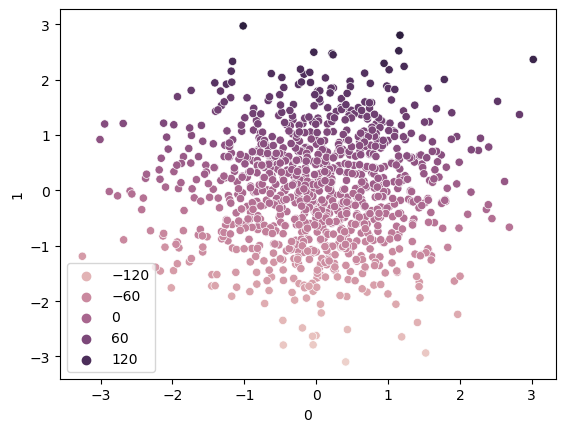

In [7]:
sns.scatterplot(x=pd.DataFrame(X)[0],y=pd.DataFrame(X)[1],hue=y)

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=10)

In [9]:
from sklearn.svm import SVR

In [10]:
svr=SVR(kernel='linear')

In [11]:
svr.fit(X_train,y_train)

SVR(kernel='linear')

In [12]:
svr.coef_

array([[ 4.498638  , 53.71008616]])

In [13]:
## Prediction
y_pred=svr.predict(X_test)

In [14]:
y_pred

array([-5.67674905e+00, -3.03212302e+01, -5.70423003e+00, -2.13150984e+01,
       -8.27237248e+00, -1.75008979e+01, -8.66118468e+01, -2.69326325e+01,
       -4.34539796e+01, -7.63620797e+01,  1.36728486e+01, -6.92654340e+01,
       -1.46818080e+01, -2.34410493e+01, -1.50083203e+01,  8.85232196e+01,
       -1.80613377e+00, -1.89824831e+01,  7.36806446e+01,  1.14112691e+01,
        1.87142443e+01,  4.09056469e+01,  1.89925828e+01, -3.70921133e+01,
        3.80962647e+01,  5.76868676e+01,  7.32170064e+01,  1.84496278e+01,
       -4.69421854e+01,  3.09817213e+01,  4.68381708e+01,  9.07061953e+01,
        1.00294214e+02,  9.91393062e+00,  1.32777644e+02, -3.62143171e+01,
        3.57792019e+01, -4.43717249e+01,  1.03624271e+02, -5.09554833e+01,
       -6.04264908e+01,  2.60326236e+00, -6.10822518e+01, -6.27928628e+01,
       -8.02467360e+01,  1.44243471e+01,  3.87987311e+01, -6.41286013e+01,
        4.58183506e+01,  1.27707591e+02,  4.91695201e+01,  7.37303271e+01,
        3.61641381e+01,  

In [15]:
from sklearn.metrics import r2_score

In [16]:
print(r2_score(y_test,y_pred))

0.9973233330383147


## Hyperparametere Tuning With SVR

In [17]:
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel':['linear'],
              'epsilon':[0.1,0.2,0.3]
              }

In [18]:
grid=GridSearchCV(SVR(),param_grid=param_grid,refit=True,cv=5,verbose=3)

In [19]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 75 candidates, totalling 375 fits
[CV 1/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.968 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.969 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.971 total time=   0.0s
[CV 2/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 3/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.968 total time=   0.0s
[CV 4/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.969 total time=   0.0s
[CV 5/5] END C=0.1, epsilon=0.1, gamma=0.1, kernel=linear;, score=0.967 total time=   0.0s
[CV 1/5] END C=0.1, epsilon=0.1, gamma

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'epsilon': [0.1, 0.2, 0.3],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear']},
             verbose=3)

In [20]:
grid.best_params_

{'C': 100, 'epsilon': 0.1, 'gamma': 1, 'kernel': 'linear'}

In [21]:
## Prediction
y_pred4=grid.predict(X_test)
print(r2_score(y_test,y_pred4))

0.9973870260234453
